In [ ]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
from ipywidgets import Layout, widgets
from google.colab import output
output.enable_custom_widget_manager()
import math
import matplotlib.dates as md

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 11.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

# S&P500 metadata
sp500_table = payload[0]

In [ ]:
# mappings 
sp500_tickers = sp500_table.Symbol.str.upper().values
sp500_names = sp500_table.Security.values
sp500_sectors = sp500_table["GICS Sector"].values
sp500_sub_sectors = sp500_table["GICS Sub-Industry"].values
sp500_names_mapping = dict(zip(sp500_tickers, sp500_names))
sp500_sector_mapping = dict(zip(sp500_names, sp500_sectors))
sp500_sub_sector_mapping = dict(zip(sp500_names, sp500_sub_sectors))
sector_color_mapping = dict(zip(sp500_sectors, sns.color_palette("pastel", len(sp500_sectors)).as_hex()))
subsector_color_mapping = dict(zip(sp500_sub_sectors, sns.color_palette("pastel", len(sp500_sub_sectors)).as_hex()))


In [ ]:
# download S&P500 financial data
tickers = list(sp500_tickers)
prices = yf.download(tickers, start="2020-01-01", end="2022-04-14", interval='1d')
prices = prices["Adj Close"]
prices = prices.rename(columns=sp500_names_mapping)
prices

[*********************100%***********************]  504 of 504 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


,Agilent Technologies,American Airlines Group,Advance Auto Parts,Apple,AbbVie,AmerisourceBergen,Abiomed,Abbott,Accenture,Adobe,...,Wynn Resorts,Xcel Energy,ExxonMobil,Dentsply Sirona,Xylem,Yum! Brands,Zimmer Biomet,Zebra,Zions Bancorp,Zoetis
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,84.666740,28.982893,154.629822,73.894325,79.461990,82.064156,168.809998,83.667671,203.171143,334.429993,...,142.405029,58.709503,61.174896,55.849361,77.805450,98.132988,142.509033,259.140015,49.020851,132.432343
2020-01-03,83.307350,27.548195,154.639526,73.175919,78.707748,81.032066,166.820007,82.647705,202.832748,331.809998,...,140.292755,58.991848,60.683090,55.231319,78.263412,97.825638,142.136490,256.049988,48.329090,132.452072
2020-01-06,83.553619,27.219410,152.098068,73.759003,79.328903,82.218468,179.039993,83.080719,201.508240,333.709991,...,140.015091,58.907135,61.149014,55.535431,77.756744,97.768005,141.315063,258.010010,47.740173,131.435181
2020-01-07,83.809731,27.119778,150.293884,73.412117,78.876350,81.630074,180.350006,82.618828,197.157684,333.390015,...,140.679504,58.784786,60.648567,55.829742,77.464424,97.940895,141.190887,256.470001,47.450382,131.879456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,135.929993,16.950001,217.580002,172.139999,171.819687,162.919998,317.519989,122.880234,340.755341,452.720001,...,73.970001,74.570000,85.050003,48.070000,86.720001,120.400002,129.910004,418.399994,63.180000,197.929993
2022-04-08,134.869995,16.590000,225.740005,170.089996,173.485535,165.440002,314.529999,122.760712,337.913818,445.339996,...,72.230003,74.820000,86.839996,48.049999,86.669998,119.169998,129.619995,415.630005,63.889999,200.089996
2022-04-11,131.259995,16.969999,220.970001,165.750000,168.398773,162.649994,299.760010,119.563454,326.298401,434.440002,...,71.290001,74.360001,83.849998,48.480000,85.730003,118.309998,126.900002,408.700012,64.230003,192.500000


In [ ]:
# impute
for i, row in prices.iterrows():
  if row.isnull().mean() > 0.9: prices.drop(i, inplace=True)
prices = prices.loc[:, prices.isnull().mean() < 0.3]
prices = prices.fillna(method='bfill')
print(prices.shape)

(576, 500)


In [ ]:
# calculate rolling correlation
corr = prices.rolling(60).corr()
corr_ = np.array([corr.loc[i].to_numpy() for i in prices.index if not np.isnan(corr.loc[i].to_numpy()).all()])
corr_ = np.nansum(corr_, axis=0)/len(corr_)
corr_ = pd.DataFrame(columns=prices.columns.tolist(), index=prices.columns.tolist(), data=corr_)


In [ ]:
corr_.head()

,Agilent Technologies,American Airlines Group,Advance Auto Parts,Apple,AbbVie,AmerisourceBergen,Abiomed,Abbott,Accenture,Adobe,...,Wynn Resorts,Xcel Energy,ExxonMobil,Dentsply Sirona,Xylem,Yum! Brands,Zimmer Biomet,Zebra,Zions Bancorp,Zoetis
Agilent Technologies,1.000000,0.120601,0.425139,0.592804,0.240154,0.316293,0.605105,0.513361,0.650516,0.633363,...,0.143997,0.190815,-0.005498,0.375448,0.725585,0.579122,0.425307,0.726794,0.168888,0.658351
American Airlines Group,0.120601,1.000000,0.209297,-0.048090,0.009975,0.060332,0.043361,-0.165550,0.111227,-0.002776,...,0.621421,-0.137155,0.427034,0.426705,0.236884,0.174001,0.350883,0.168990,0.512057,-0.132807
Advance Auto Parts,0.425139,0.209297,1.000000,0.442593,0.377156,0.332305,0.283646,0.300236,0.629507,0.356271,...,0.156267,0.270670,0.308302,0.312947,0.425257,0.469213,0.391474,0.418725,0.348197,0.508742
Apple,0.592804,-0.048090,0.442593,1.000000,0.392353,0.259043,0.613929,0.575265,0.690348,0.668066,...,0.086541,0.307506,-0.033142,0.144427,0.341705,0.515779,0.254571,0.550179,0.074784,0.625038
AbbVie,0.240154,0.009975,0.377156,0.392353,1.000000,0.474627,0.194373,0.121088,0.407021,0.115457,...,0.150756,0.243665,0.428806,0.251330,0.149940,0.368802,0.194490,0.316184,0.337601,0.277702


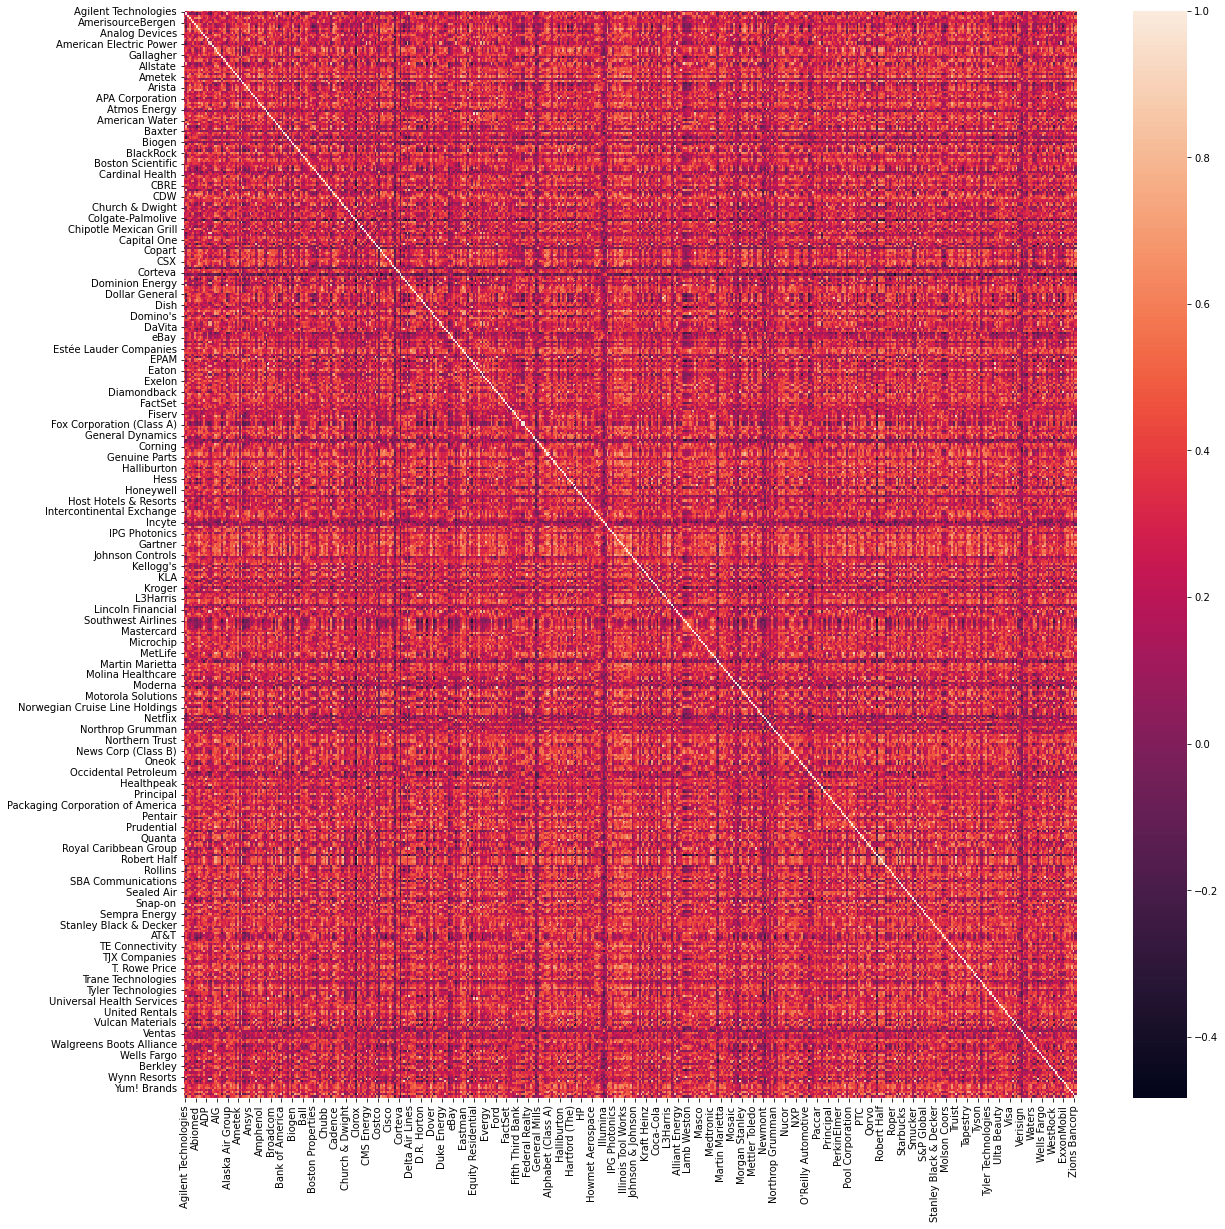

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


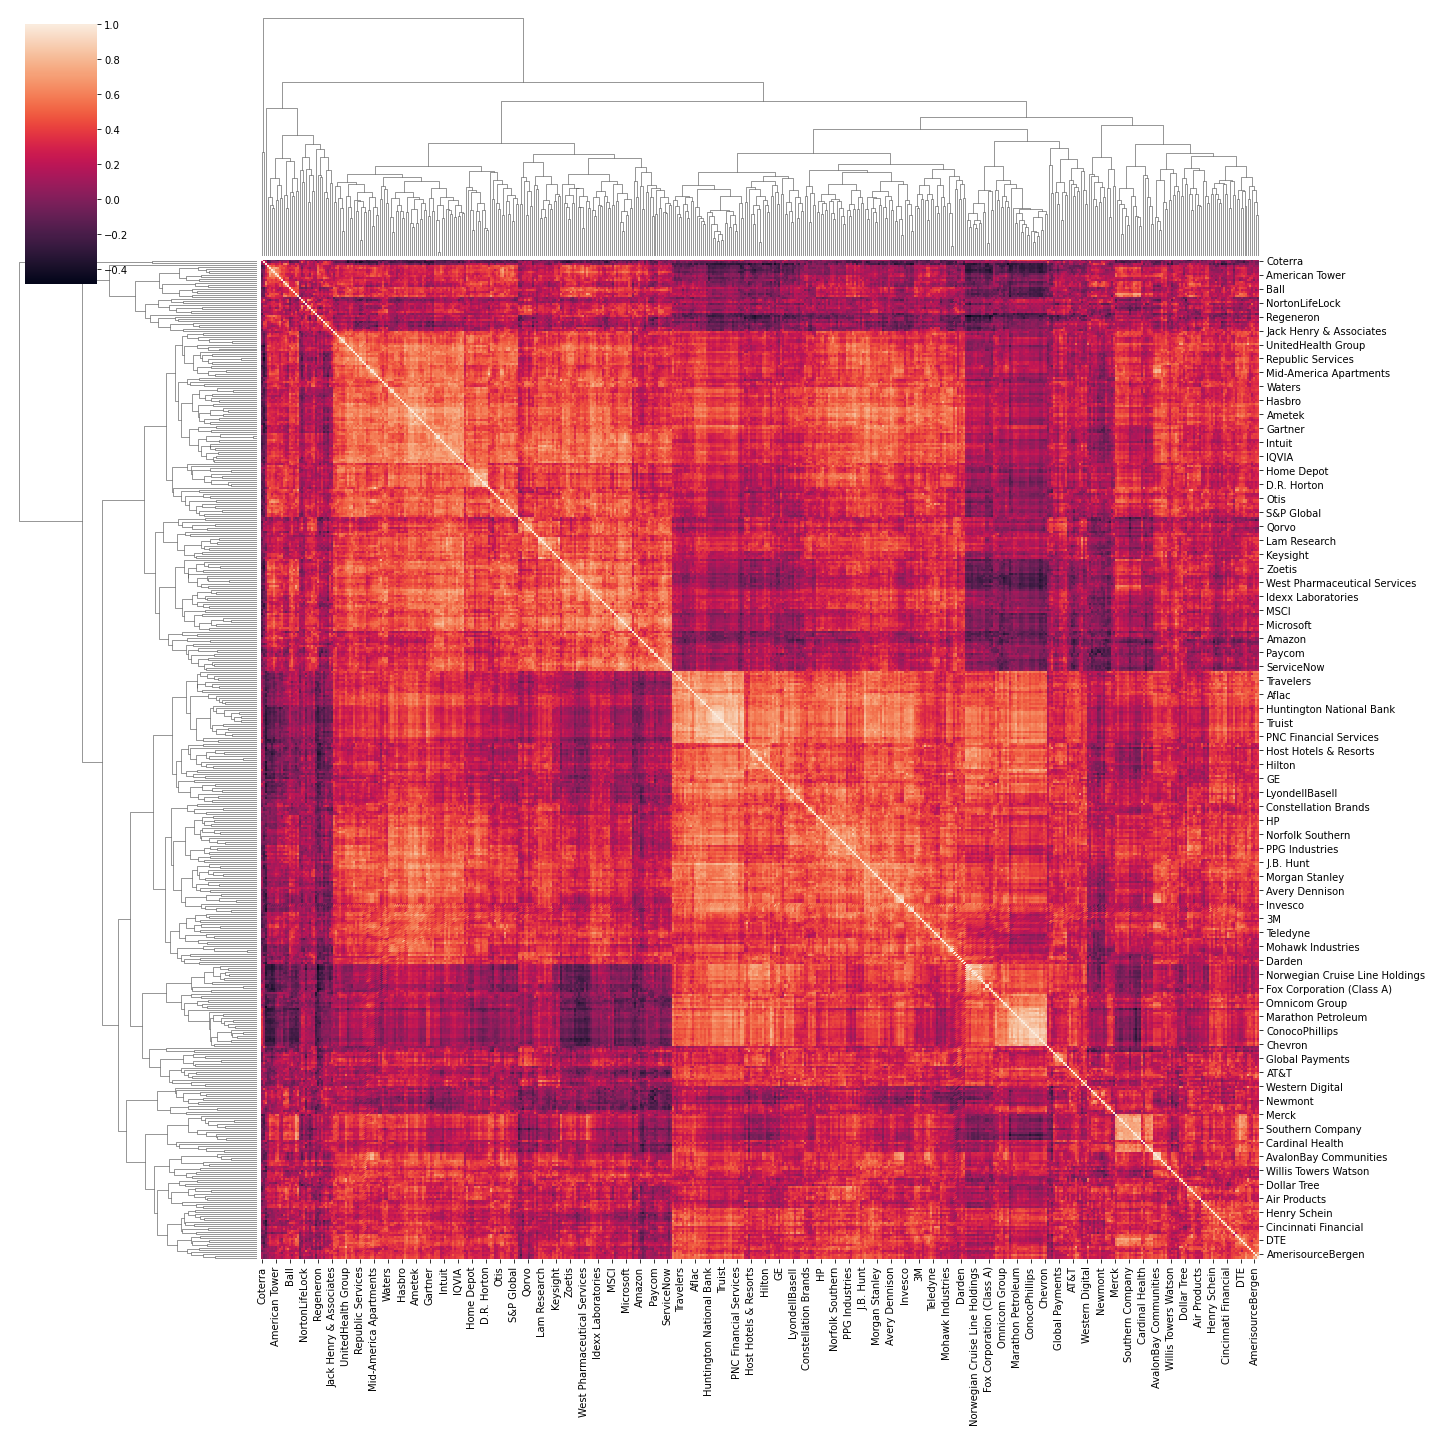

In [ ]:
sns.clustermap(corr_, figsize=(20,20))

In [ ]:
threshold_choice = widgets.FloatSlider(description="Threshold", value=0.8, min=0.5, max=1, step=0.05, continuous_update=False, 
                                       orientation='horizontal', layout=Layout(width='500px'), style=dict(description_width= 'initial'))
network = go.FigureWidget(data=[go.Scatter(x=[], y=[], mode='lines', text=[],  line=dict(color='MediumPurple', width=10), marker=dict(size=20, line_width=10,line=dict(color='MediumPurple',width=2))),
                                 go.Scatter(x=[], y=[],mode='markers+text', textposition="top center", text=[],hoverinfo='text',textfont_size=12, marker=dict(size=50, color=[],line_width=1))],
                          layout=go.Layout( showlegend=False, annotations=[], margin=dict(t=40, b=0, l=0, r=0), width=1600, height=800))
df = prices.copy()
correlation_matrix = corr_.to_numpy()

def plot_corr_graph(change):
    threshold, corr_mode = None, None
    threshold = change.new
    
    tr_ind = np.triu_indices(correlation_matrix.shape[0])
    correlation_matrix[tr_ind] = 0
    G = nx.from_numpy_matrix(correlation_matrix)
    G = nx.relabel_nodes(G, lambda x: df.columns.tolist()[x])
    # 49 x 49 - 49 (self corr) / 2 (remove upper triang)
    remove = []
    
    for col1, col2, weight in G.edges(data=True):
      if math.isnan(weight["weight"]):
        remove.append((col1,col2))
    
      if abs(weight["weight"]) < threshold:
        remove.append((col1,col2))
    
    G.remove_edges_from(remove)
    
    remove = []
    edges = list(sum(G.edges, ()))
    
    for node in G.nodes:
      if node not in edges:
        remove.append(node)
    G.remove_nodes_from(remove)
    mst = nx.maximum_spanning_tree(G)
    
    def assign_color(col):
      return sector_color_mapping[sp500_sector_mapping[col]]
    def assign_color_edge(correlation):
      if correlation < 0:
        return "#BF0603"
      else:
        return "#00CC66"
    edge_colors = []
    node_colors = []
    for key, value in nx.get_edge_attributes(mst, 'weight').items():
        edge_colors.append(assign_color_edge(value))
    for key, value in dict(mst.degree).items():
        node_colors.append(assign_color(key))
      
    labels = {n:n for n in mst.nodes()}
    node_x = []
    node_y = []
    
    tree = nx.fruchterman_reingold_layout(mst, k=0.25).items()
    
    for node, (x_,y_) in tree:
        node_x.append(x_)
        node_y.append(y_)
        
    def get_dim_of_node(name):
        for node, (x,y) in tree:
            if node == name:
                return x,y
        
    edge_x = []
    edge_y = []
    
    weights= []
    for node1, node2, w in mst.edges(data=True):
        x0, y0 = get_dim_of_node(node1)
        x1, y1 =  get_dim_of_node(node2)
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
        weights.append((round(w["weight"],1), (x0+x1)/2, (y0+y1)/2))
                              
    with network.batch_update():
        network.data[1].x = node_x
        network.data[1].y = node_y
        network.data[1].text = list(labels)
        network.data[1].marker.color = node_colors
                          
        network.data[0].x = edge_x
        network.data[0].y = edge_y
        network.data[0].text = list(weights)
        network.update_layout(xaxis_zeroline=False, yaxis_zeroline=False, xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor='rgba(0,0,0,0)')

threshold_choice.observe(plot_corr_graph, names="value")
widgets.VBox([threshold_choice, network])

In [ ]:
network

FigureWidget({
    'data': [{'line': {'color': 'MediumPurple', 'width': 10},
              'marker': {'line': …